<a href="https://colab.research.google.com/github/Carlos-Ivan-Hernandez-Lopez/Simulacion-II/blob/main/Examen1/Problema3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instituto Politécnico Nacional 

Escuela superior de física y matemáticas

Simulación II

Primer examen parcial.

Carlos Iván Hernández López

# 26. Una empresa dispone de varias máquinas herramienta cuyas herramientas de corte se desgastan constantemente.
Cuando esto ocurre, la maquina es inservible. En la actualidad el mantenimiento es correctivo reemplazándose una herramienta cuando falla. Dado que cada maquina dispone de una torre con cinco herramientas, se propone reemplazar toda la torre de herramientas (las cinco herramientas de golpe) cada vez que falle una, lo que deberia reducir la frecuencia de desgaste de las herramientas. El tiempo necesario para el reemplazo de una herramienta es de una hora. las cinco pueden reemplazarse en dos horas. El coste de una hora de máquina parada es de cien euros. Cada herramienta cuesta diez euros. La table siguiente recoge los datos de averias en el caso de sistituir una sola herramienta cada vez.

|Horas entre averías si sustituye una herramienta|20|30|40|50|60|70|80|
|-|-|-|-|-|-|-|-|
|Probabilidad|0.05|0.15|0.15|0.20|0.20|0.15|0.10|

Si las cinco herramientas se cambian cada vez que una falla, la distribución de probabilidad entre fallos es la siguiente:

|Horas entre averías si sustituye una herramienta|30|40|50|60|70|80|90|
|-|-|-|-|-|-|-|-|
|Probabilidad|0.05|0.15|0.15|0.20|0.20|0.15|0.10|

Determine mediante simulación la mejor política de reemplazo de las herramientas de corte.

##Solución
Usaremos la metodologia de la simulación

### Paso 1: Define las variables.
Ocuparemos dos variables

$H1$: Representa el cambio de una sola herramienta

$H5$: Representa el cambio de las cinco herramientas


###Paso 2 y 3: Defina la distribución de probabilidad y modele las variables aleatorias.
La distribución de probabilidad se presenta en el problema y quedan modeladas de la siguiente forma.

$$H1\sim \begin{cases}20 & p=0.05 \\ 30 & p=0.15 \\ 40 & p=0.15 \\ 50 & p=0.20 \\ 60 & p=0.20 \\70 & p=0.15 \\ 80 & p=0.10 \end{cases}$$

$$H5\sim \begin{cases}30 & p=0.05 \\ 40 & p=0.15 \\ 50 & p=0.15 \\ 60 & p=0.20 \\ 70 & p=0.20 \\80 & p=0.15 \\ 90 & p=0.10 \end{cases}$$

### Paso 4:Defina el modelo del sistema y los objetivos de la simualción.
El modelo que usaremos sera

$$MejorPolitica=min(Perdida_{H1},Perdida_{H2})$$
donde 
$$Perdida(H)=TiempoPerdido*100$$

El objetivo de la simulación es determinar la mejor politica de cambio de piezas.


In [ ]:
# Se importan las librerias que usaremos.
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math 

In [ ]:
def H1(): #Esta función describe el comportamiento de H1 y devuelve las horas trabajadas.
  M=rd.random()
  h=0
  if M<0.05:
    h=20
  else:
    if M<0.20:
      h=30
    else:
      if M<0.35:
        h=40
      else:
        if M<0.55:
          h=50
        else:
          if M<0.75:
            h=60
          else:
            if M<0.90:
              h=70
            else:
              if M<=1:
                h=80
  return h

In [ ]:
def H2(): #Esta función describe el comportamiento de H2 y devuelve las horas trabajadas.
  M=rd.random()
  c=0
  if M<0.05:
    c=30
  else:
    if M<0.20:
      c=40
    else:
      if M<0.35:
        c=50
      else:
        if M<0.55:
          c=60
        else:
          if M<0.75:
            c=70
          else:
            if M<0.90:
              c=80
            else:
              if M<=1:
                c=90
  return c

### Paso 5: Diseñe el experimento.
El experimento registra el costo promedio de reparacion de la maquina y lo guarda en una lista para ambos casos.

In [96]:
def mejor(n): #Esta función caclula es costo promedio de la politica H1 en n repeticiones. 
  P=[]
  c=0
  Promedio=0
  for i in range(n):
    if (100/H1()>(100/H2())):
      c+=1
    P.append(c/(i+1))
  Promedio=np.mean(P)
  if Promedio>0.5:
    print('Es mejor cambiar la politica.')
  else:
    print('Es mejor dejar la politica actual.')
  return P

Es mejor cambiar la politica.


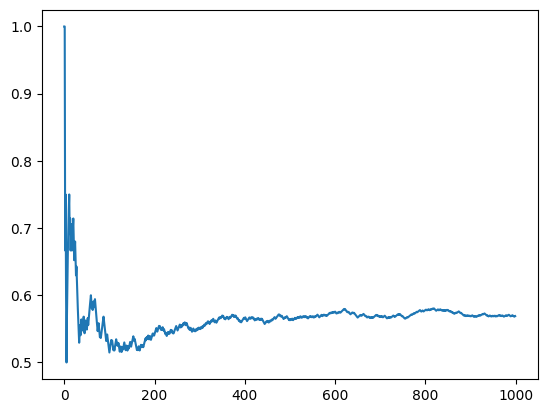

In [97]:
x=mejor(1000)
plt.plot(x)

In [98]:
Media=np.mean(x)
DesEst=np.std(x)
print(Media,DesEst)

0.5658295770969822 0.03105547429714282


### Paso 6: Repita el experimento $N$ veces
Encontramos $N$ por medio del teorema central del limite.


In [99]:
N=math.ceil((2*DesEst*1.96/0.01)**2) #El teorema central del limite nos dara una aproximacion a la cantidad de reprticiones que se requieren para que el experimento
print(N)                  #regrese resultados confiables.

149


In [101]:
def rep(j):
  lista=[]
  for i in range(j):
    r=mejor(1000)
    lista.append(np.mean(r))
  return lista

Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor cambiar la politica.
Es mejor c

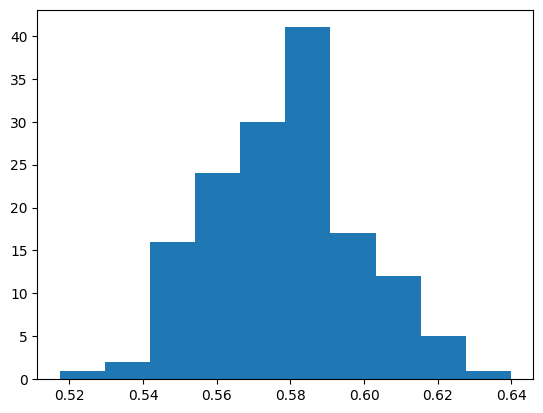

In [102]:
Y=rep(N)
plt.hist(Y)
plt.show()

In [103]:
X=np.mean(Y)
s=np.std(Y)
print(X,s)

0.578463198218061 0.020660572732152674


### Paso 7. Obtener el intervalo de confianza.
Para obtener el intervalo de confianza usaremos
$$\bar{x}-z_{α/2}*s/\sqrt{n}<μ<\bar{x}+z_{α/2}*s/\sqrt{n}$$
con un nivel de confianza del 95%

In [104]:
li=X-(1.96*s/np.sqrt(N)) #Se calculan los limites con los parametros que tenemos.
ls=X+(1.96*s/np.sqrt(N))
print('El intervalo de confianza es:[', li, ',', ls, ']')

El intervalo de confianza es:[ 0.5751457412850977 , 0.5817806551510244 ]
